In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

In [87]:
image = img.imread("IoriYagami.jpg")
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

In [88]:
kernelLow = np.array([0.7, 0.7])
kernelHigh = np.array([-0.7, 0.7])

In [89]:
def padding(array):
    result = np.pad(array, ((0, 1), (0, 1))) 
    return result

In [90]:
def convolution(arrayPad, kernel, arrayAsal):
    result = np.zeros(arrayAsal.shape)
    row, col = arrayAsal.shape
    for i in range(row):
        for j in range(col):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * arrayPad[i, j + k])
    return result

In [91]:
def convolution2(arrayPad, kernel, arrayAsal):
    result = np.zeros(arrayAsal.shape)
    row, col = arrayAsal.shape
    for i in range(row):
        for j in range(col):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * arrayPad[i + k, j])
    return result

In [92]:
def downSamplingKolom(array):
    row, col = array.shape
    row2 = int(row)
    col2 = int(col / 2)
    result = np.zeros((row2, col2))
    for i in range(row2):
        x = 0
        for j in range(col2):
            result[i][j] = array[i][x]
            x += 2
    return result

In [93]:
def downSamplingBaris(array):
    row, col = array.shape
    row2 = int(row / 2)
    col2 = int(col)
    result = np.zeros((row2, col2))
    x = 0
    for i in range(row2):
        for j in range(col2):
            result[i][j] = array[x][j]
        x += 2
    return result

In [94]:
def merge(LL, LH, HL, HH):
    atas = np.concatenate((LL, LH), axis=1)
    bawah = np.concatenate((HL, HH), axis=1)
    return np.concatenate((atas, bawah), axis=0)

In [95]:
grayPad = padding(gray_image)

LL = convolution(grayPad, kernelLow, gray_image)
lowDS = downSamplingKolom(LL)
lowDSpad = padding(lowDS)
LLFiltered = convolution2(lowDSpad, kernelLow, lowDS)

LH = convolution(grayPad, kernelHigh, gray_image)
highDS = downSamplingKolom(LH)
highDSpad = padding(highDS)
LHFiltered = convolution2(highDSpad, kernelHigh, highDS)

In [96]:

LL = downSamplingBaris(LLFiltered)
LH = downSamplingBaris(LHFiltered)

HL = convolution(grayPad, kernelLow, gray_image)
highDS = downSamplingKolom(HL)
highDSpad = padding(highDS)
HLFiltered = convolution2(highDSpad, kernelHigh, highDS)

HH = convolution(grayPad, kernelHigh, gray_image)
highDS = downSamplingKolom(HH)
highDSpad = padding(highDS)
HHFiltered = convolution2(highDSpad, kernelHigh, highDS)

HL = downSamplingBaris(HLFiltered)
HH = downSamplingBaris(HHFiltered)

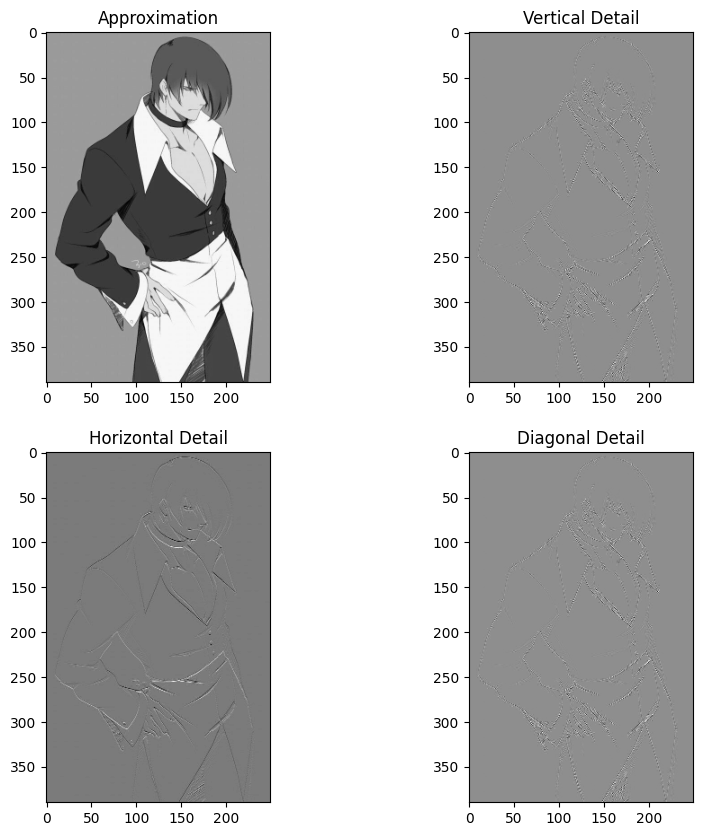

In [97]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Vertical Detail')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Horizontal Detail')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Detail')

plt.show()